# Day 2: Open data, where to get it, and how to use it ethically

Today's agenda:
- Ben Liu visit 
- Answer any questions from previous day
- How to get answers to questions: StackOverflow, GIS StackExchange, Github/GitLab issues
- How to download OpenStreetMap data and visualize it
- Discussion of open data: Open Data Handbook, Collaborative Data Patterns, CARE principles, data licensing


## Welcome Ben Liu!

## Questions from yesterday?

## How to find answers!

Let's cause an intentional error: I've created a new conda virtual environment using the following process: 

1. Create an env using `conda create --name goepandas_test`
2. Install jupyter and geopandas `conda install jupyter geopandas`

We'll now try to explore the same geojson file that we used yesterday. 


In [6]:
import geopandas as gpd 

gdf = gpd.read_file('treaties_map.geojson')

In [7]:
gdf.explore()

Notice the error, `AttributeError: 'GeoDataFrame' object has no attribute 'explore'` 

We tried the same function yesterday, but not it is not working. What is going on? Let's try to find a solution. 

1. Search [DuckDuckGo.com](https://duckduckgo.com) for our error (usually the last line of our traceback, of the form `SomethingError`, e.g. `AttributeError`, `IndexError`, etc...)
    - **Note** that we're using DuckDuckGo, not Google: DDG often gives more relevant programming answers.
2. The first result is a [StackOverflow question](https://stackoverflow.com/questions/69539995/geodataframe-object-has-no-attribute-explore), with the exact same error. Look at the answers: the accepted answer states that we need to install version geopandas 0.10.1, but doesn't tell us how. The second answer tell us to use pip for installing, but we know that we're using conda, so we'll use that instead. 
3. Search the [conda docs](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-packages) for how to install a specific version of a geopandas
4. Look at [yesterday's notebook](https://gitlab.com/masrad/school_of_cities_data_science_workshop/-/blob/main/day%201.ipynb) for how to install the correct version of geopandas
5. Try the command again!


Another place to look is in the Github/GitLab repository of the package that you are using. 

1. Find the Github repository for geopandas
2. Click on the issues tab 
3. Remove the `is:open` in the search bar, and search for the keyword you want. In our case, `explore`. [Search](https://github.com/geopandas/geopandas/issues?page=2&q=explore)
4. Find the correct issue with the right solution [here](https://github.com/geopandas/geopandas/issues/2178)



## Let's get some granular data from OpenStreetMap

OpenStreetMap (OSM) is an open database of spatial data that you can use for free under two conditions: 1) attribute the data to the OSM contributors, and 2) Share the output under the same license.

Explore OSM on the main website: https:openstreetmap.org

We can download OSM data using a lot of different ways. My preferred way is using [Overpass Turbo](https://overpass-turbo.eu/), but it is a bit too complicated for our purposes, so we'll use a very good tool, the Humanitarian OpenStreetMap Team export tool: https://export.hotosm.org/en/v3/

0. Login using your OSM account (you'll have to create one if you don't already have one)
1. Name our export, and choose GeoPackage as the format. 
    - **Remember** DON'T use Shapefile if you can. More details [here](http://switchfromshapefile.org/)
2. Choose transportation infrastructure > footpaths 
3. Choose the area (Toronto) and download your export. 
4. Unzip the file and move it to the directory containing your notebook

Let's explore our footpaths:


In [8]:
paths = gpd.read_file('ds_example.gpkg') #renamed for mjw

<AxesSubplot:>

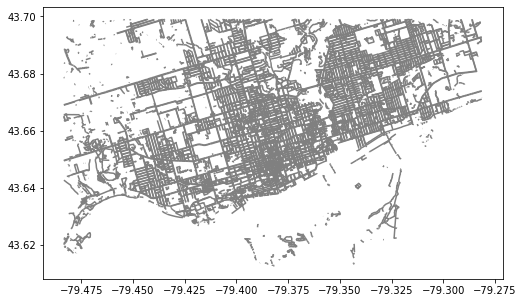

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize = (15,5)) #fig size is width, height

paths.plot(ax = axes, edgecolor='grey')

<AxesSubplot:>

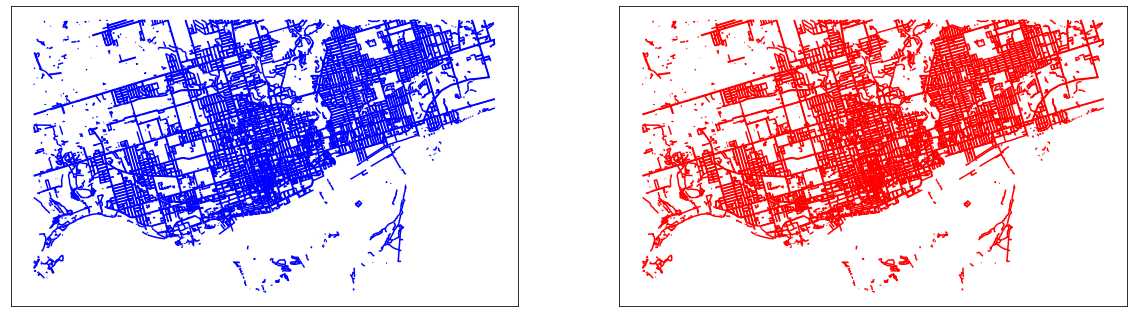

In [26]:
fig, axes = plt.subplots(1,2, figsize = (20,10))

#turn off tick marks if you want...
axes[0].axes.xaxis.set_visible(False)
axes[0].axes.yaxis.set_visible(False)
axes[1].axes.xaxis.set_visible(False)
axes[1].axes.yaxis.set_visible(False)

#create grid of plots
paths.plot(ax = axes[0], edgecolor = 'blue')
paths.plot(ax = axes[1], edgecolor = 'red')


<AxesSubplot:>

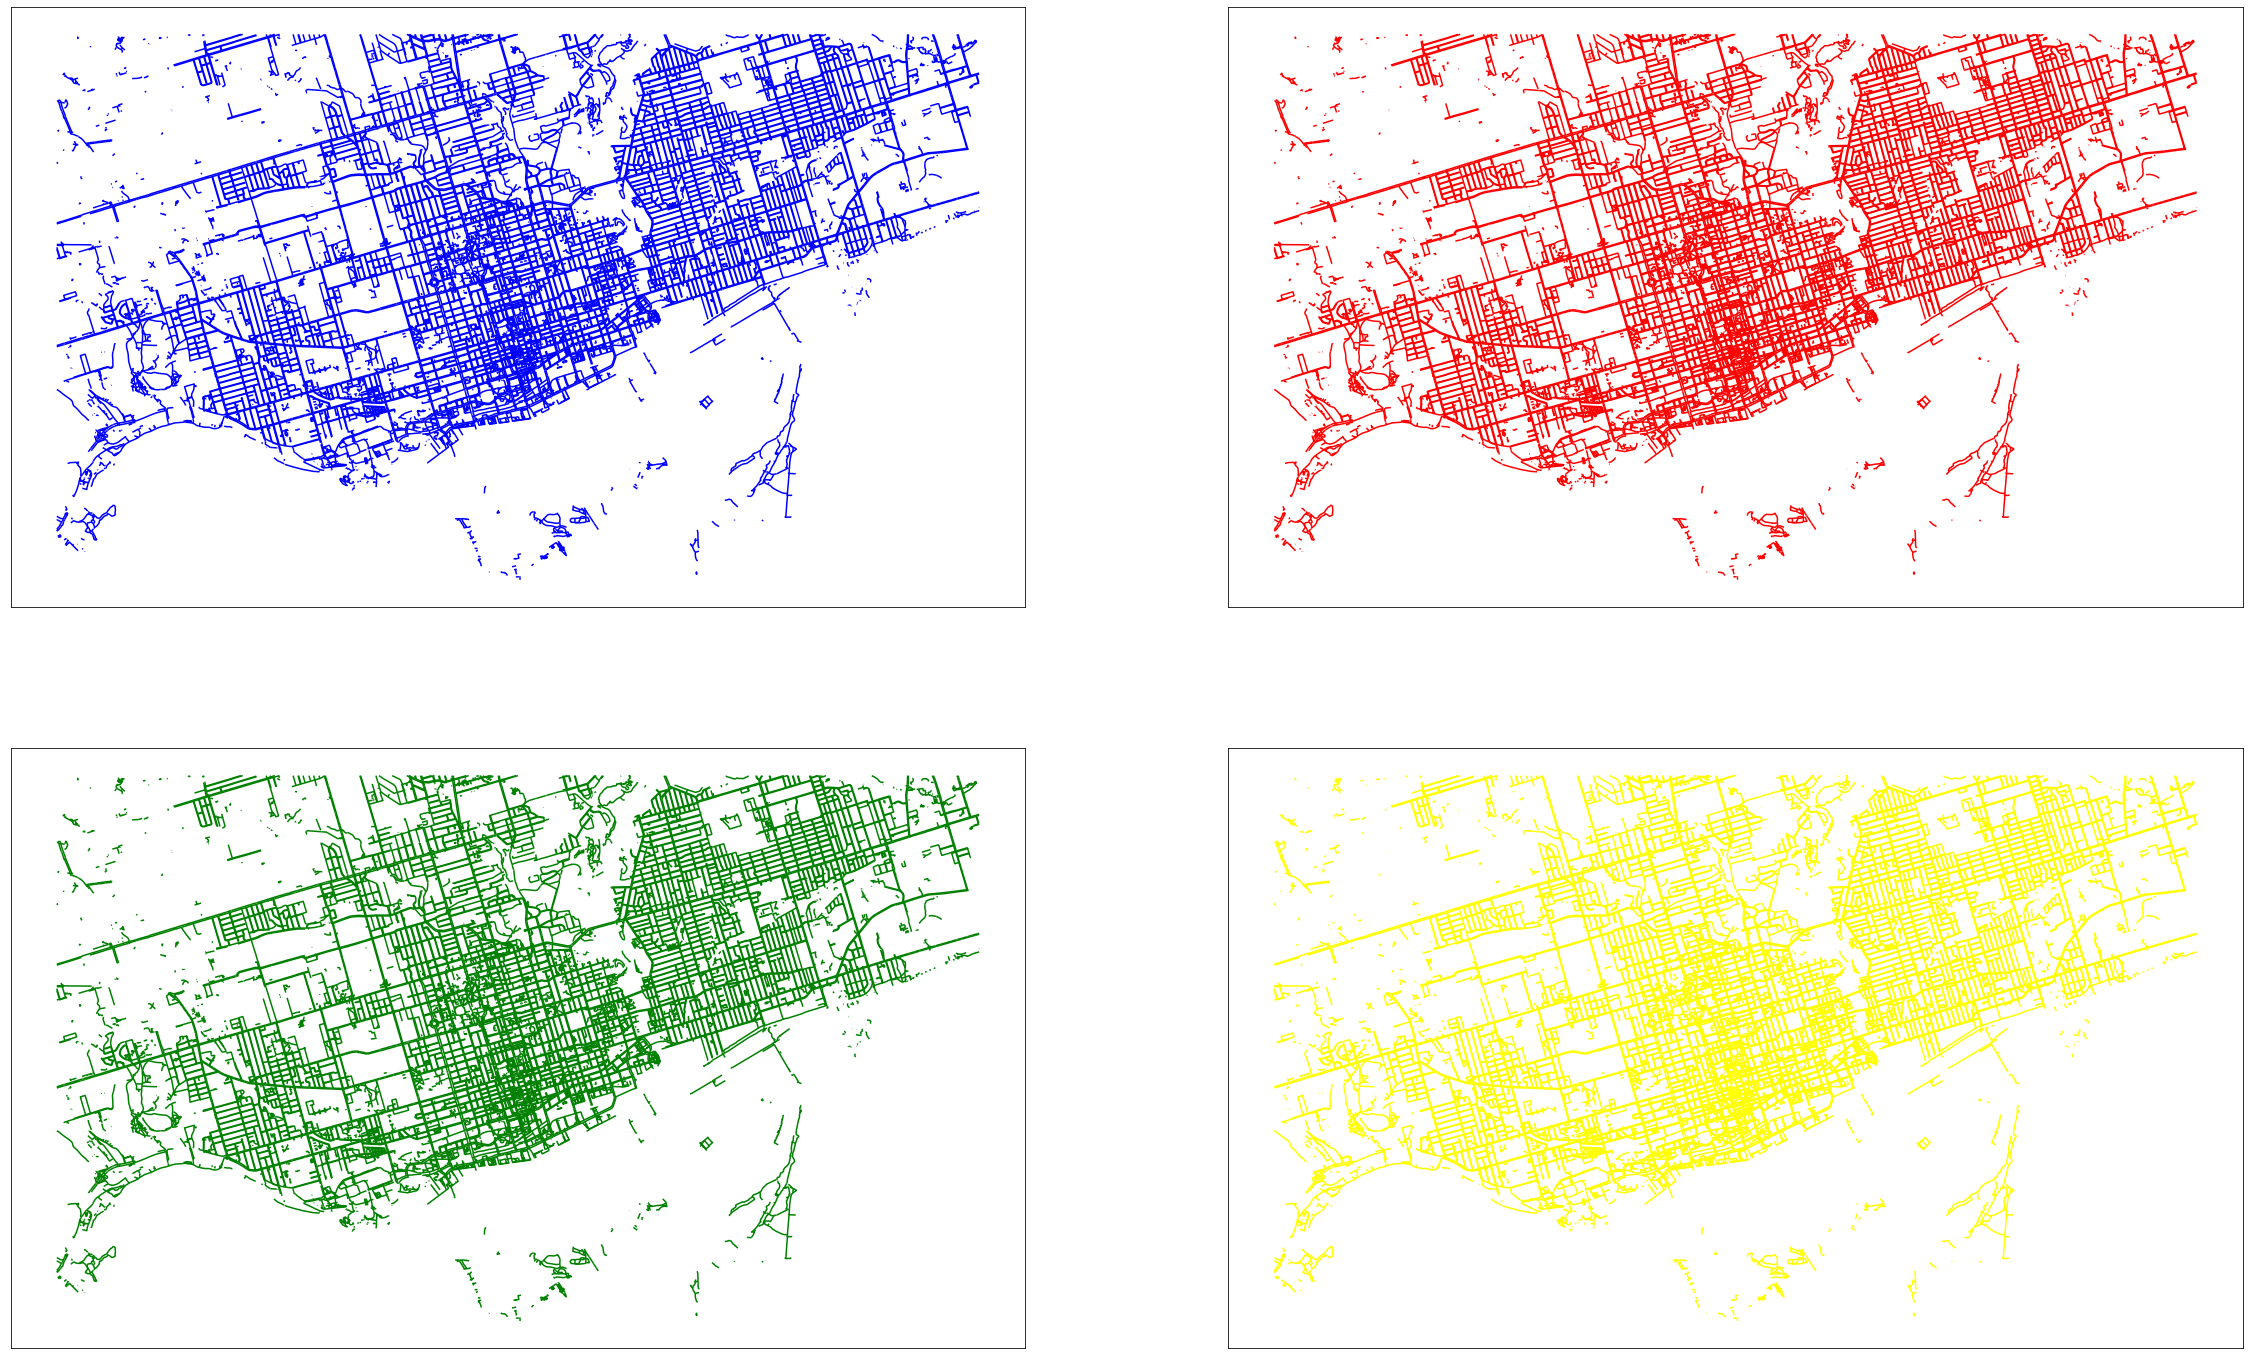

In [44]:
fig, axes = plt.subplots(2,2, figsize = (40,25))

#turn off tick marks if you want...
axes[0,0].axes.xaxis.set_visible(False)
axes[0,0].axes.yaxis.set_visible(False)
axes[0,1].axes.xaxis.set_visible(False)
axes[0,1].axes.yaxis.set_visible(False)
axes[1,0].axes.xaxis.set_visible(False)
axes[1,0].axes.yaxis.set_visible(False)
axes[1,1].axes.xaxis.set_visible(False)
axes[1,1].axes.yaxis.set_visible(False)

#create grid of plots
paths.plot(ax = axes[0,0], edgecolor = 'blue')
paths.plot(ax = axes[0,1], edgecolor = 'red')
paths.plot(ax = axes[1,0], edgecolor = 'green')
paths.plot(ax = axes[1,1], edgecolor = 'yellow')

In [27]:
paths.head()

osm_id  highway tunnel layer        surface bridge  \
0  4165501  footway   None  None  paving_stones   None   
1  4300593  footway   None  None           None   None   
2  4300730  footway   None  None        asphalt   None   
3  4495398  footway   None  None           None   None   
4  5090396  footway   None  None           None   None   

                                            geometry  
0  LINESTRING (-79.41815 43.63435, -79.41823 43.6...  
1  LINESTRING (-79.41944 43.66326, -79.41932 43.6...  
2  LINESTRING (-79.41964 43.66625, -79.41973 43.6...  
3  LINESTRING (-79.32241 43.67763, -79.32237 43.6...  
4  LINESTRING (-79.37166 43.66983, -79.37187 43.6...

In [28]:
paths.count()

osm_id      18122
highway     18122
tunnel        471
layer         740
surface      4009
bridge        260
geometry    18122
dtype: int64

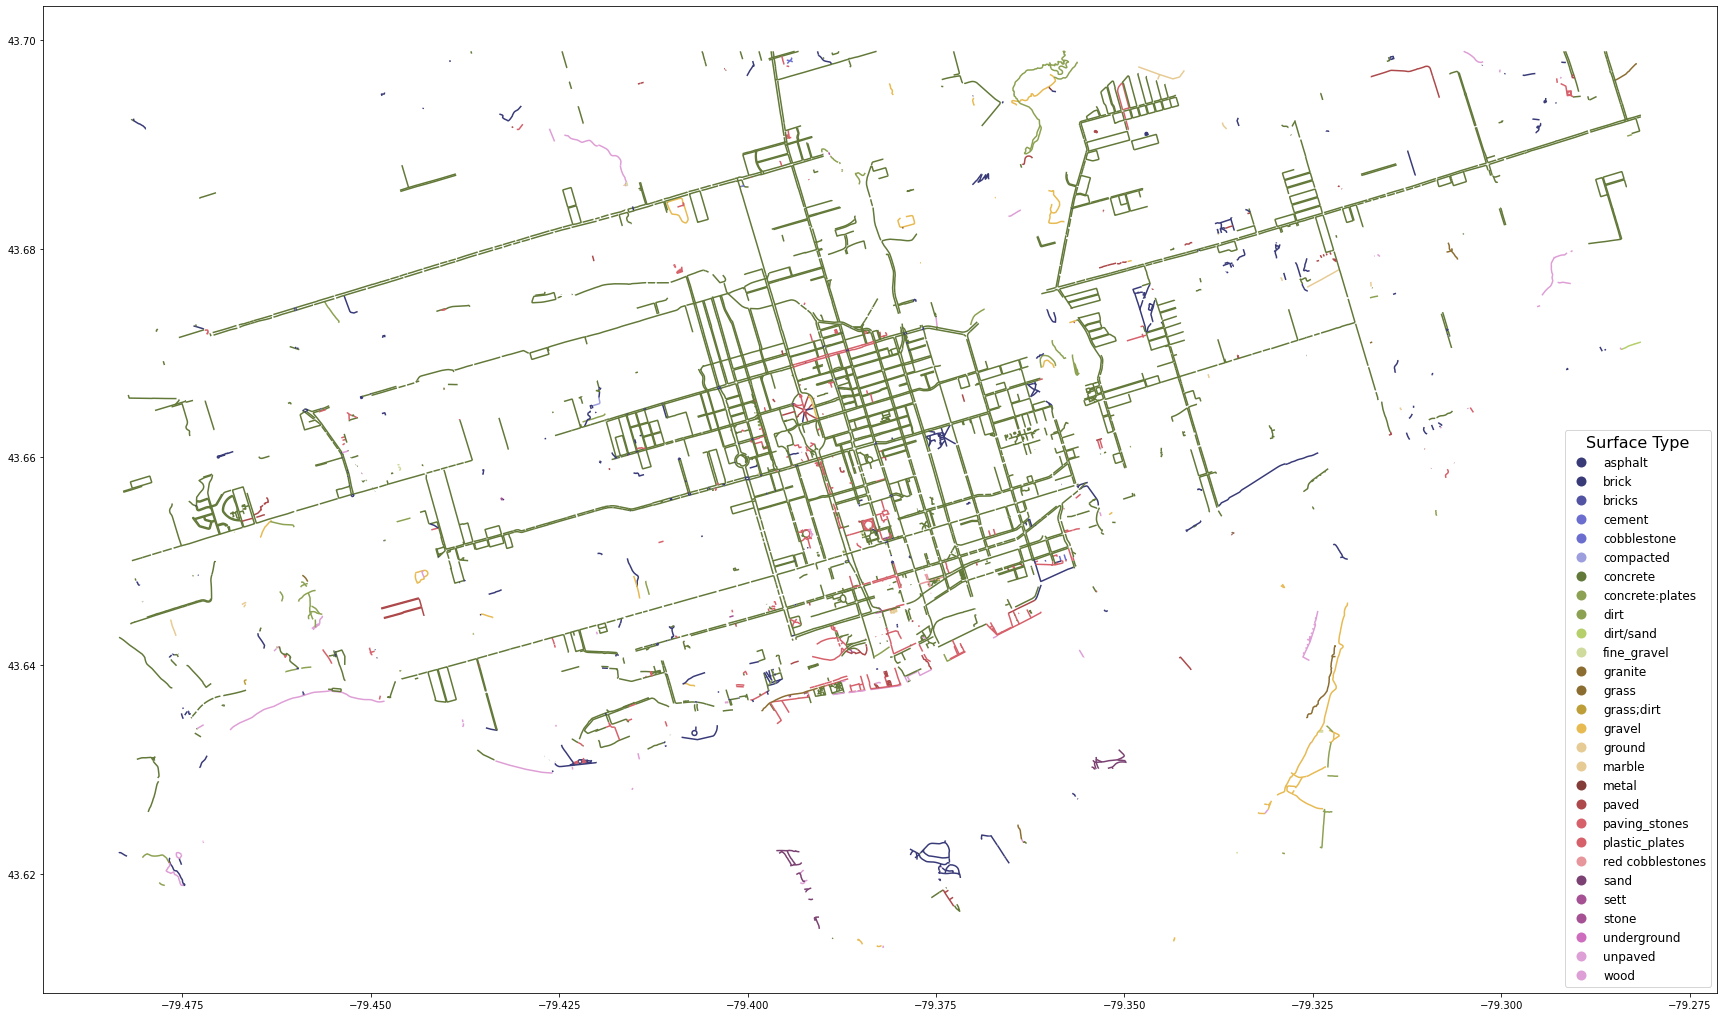

In [35]:
fig, axes = plt.subplots(1, 1, figsize = (30, 20))


paths.plot(column = 'surface', legend=True, ax = axes, cmap = 'tab20b',
                            legend_kwds={'loc': 4, 'title': 'Surface Type', 
                               'title_fontsize': 16,'fontsize': 12})

current_fig = plt.gcf() #get current figure aka gcf
current_fig.savefig('toronto_paths.png',dpi=100) #export maps as an image file!


## Where does OSM data come from?

Things to remember:
- OSM data is volunteered data!
- The labour that goes into maintaining OSM data is important 
- Always think of data as a pipeline: 
    - Who decides what data to collect? Why these particular data?
    - How are the data collected? By whom? Using what tools and instruments? Relying on which other data?
    - How are the data cleaned, stored, and governed?
    - How are the data shred with other people? Who is using them?
    
### Useful tools and links
- [Open Data Handbook](https://opendatahandbook.org/)
- [Collaborative data patterns](https://collaborative-data.theodi.org/)
- [FAIR and CARE principles for data](https://www.gida-global.org/care)




